<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/Cancer_data_call_back_batch_norm_kera_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using RandomSearchCV(model= KerasClassifier(builf_fn= model , param_distrubutions=dictionsry ,cv=KFold(3)**






In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [17]:
print((cancer['data'].shape, cancer['target'].shape))
X=cancer['data']
y=cancer['target']

((569, 30), (569,))


Model function with Learning rate & activation paremeters. Using 1 input, 1 hidden & 1 output layer .Output has sigmoid activation as we are dealing with binary classification.We can only change the activation of the other layers

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Dense

In [0]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.30)

In [15]:
(X_train.shape,y_train.shape)

NameError: ignored

In [0]:
print((cancer['data'].shape, cancer['target'].shape))

((569, 30), (569,))


In [0]:
(X_test.shape,y_test.shape)

((171, 30), (171,))

In [0]:
def my_model(learning_rate=0.01,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation=activation))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [7]:
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [0]:
model=KerasClassifier(build_fn=my_model)
params = {'activation': ['relu','tanh'], 'batch_size': [32,128,256], 
          'epochs': [50,100,200], 'learning_rate': [0.1,0.01,0.001]}

random_search=RandomizedSearchCV(model,param_distributions=params,cv=KFold(3))


In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
stop_early=EarlyStopping(monitor='val_acc',patience=3)

In [19]:
history=random_search.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5925
Epoch 108/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.5925
Epoch 109/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5925
Epoch 110/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5925
Epoch 111/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5925
Epoch 112/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5887
Epoch 113/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4868
Epoch 114/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5925
Epoch 115/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5736
Epoch 116/200
3/3 [==============================] - 0s 3ms/step - loss:

In [23]:
history.best_params_

{'activation': 'relu', 'batch_size': 32, 'epochs': 200, 'learning_rate': 0.01}

# **With above best params we train our model.The 


my_model() function is redefined with these new params**


{'activation': 'tanh',
 'batch_size': 128,
 'epochs': 200,
 'learning_rate': 0.001}



In [0]:
def my_model(learning_rate=0.001,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation='relu'))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
my_model=my_model(learning_rate=0.001,activation='relu')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
stop_early=EarlyStopping(monitor='val_acc',patience=3)

In [28]:
historynew=my_model.fit(X_train,y_train,batch_size=128,epochs=200,validation_split=0.3,callbacks=[stop_early])

Epoch 1/200
3/3 [==============================] - 0s 37ms/step - loss: 23.0349 - accuracy: 0.5036 - val_loss: 21.0259 - val_accuracy: 0.3917
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 13.0318 - accuracy: 0.4065 - val_loss: 13.2796 - val_accuracy: 0.6083
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 7.9779 - accuracy: 0.6583 - val_loss: 6.2518 - val_accuracy: 0.3917
Epoch 4/200
3/3 [==============================] - 0s 13ms/step - loss: 9.9445 - accuracy: 0.3813 - val_loss: 7.0865 - val_accuracy: 0.3917
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 3.7370 - accuracy: 0.5432 - val_loss: 5.5572 - val_accuracy: 0.7083
Epoch 6/200
3/3 [==============================] - 1s 167ms/step - loss: 4.5007 - accuracy: 0.7266 - val_loss: 1.1066 - val_accuracy: 0.8833
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 2.2876 - accuracy: 0.8165 - val_loss: 3.2443 - val_accuracy: 0.5417
Epoch 8/200
3/3

In [0]:
history_dict = historynew.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [30]:
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

In [31]:
len(historynew.history['accuracy'])

200

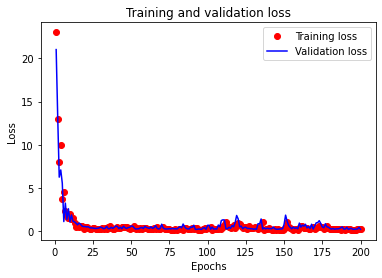

In [32]:
history_dict = historynew.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(historynew.history['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

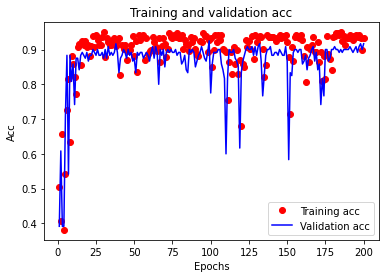

In [34]:
history_dict = historynew.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(historynew.history['accuracy']) + 1)
plt.plot(epochs, acc_values, 'bo',color='red', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [35]:
for i in historynew.history.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


# Fitting the model on the whole X and **y**

In [0]:
historynew=my_model.fit(X,y,batch_size=128,epochs=200,validation_split=0.2,callbacks=[stop_early])

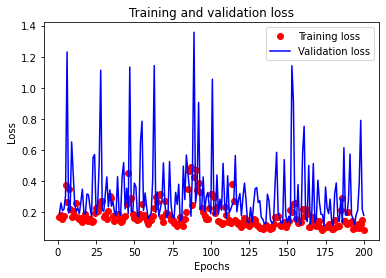

In [37]:
history_dict = historynew.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(historynew.history['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

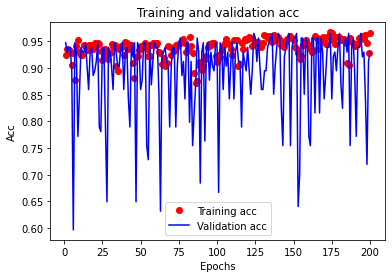

In [38]:
history_dict = historynew.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(historynew.history['accuracy']) + 1)
plt.plot(epochs, acc_values, 'bo',color='red', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### **Part -2**

Using the model with best params obtained from **RandomizedSearchCV.fit(X.y)**

{'activation': 'tanh',
 'batch_size': 128,
 'epochs': 200,
 'learning_rate': 0.001}



In [0]:
def my_model(learning_rate=0.001,activation='relu'):
  opt=Adam(learning_rate=learning_rate)
  model=Sequential()
  model.add(Dense(148,input_shape=(30,),activation='relu'))
  model.add(Dense(296,activation=activation ))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
my_tuned_model=my_model(learning_rate=0.001,activation='relu')

In [0]:
# Create a KerasClassifier...no need...no need here as it has no layers
model_kera_tuned = KerasClassifier(build_fn = my_tuned_model, epochs = 200,batch_size = 128, verbose = 0)

In [0]:
import keras.backend as K

In [0]:
# Input tensor from the 1st layer of the model
inp = my_tuned_model.layers[0].input

In [0]:
out=my_tuned_model.layers[0].output

In [0]:
inp_to_out=K.function(inp,out)

In [0]:
print(inp_to_out(X_test))

[[12.580634  10.500716   0.        ...  0.         0.         0.       ]
 [16.645084   0.         0.        ...  0.         0.         0.       ]
 [ 9.805404  11.763249   0.        ...  0.         0.         0.       ]
 ...
 [41.058636  21.925547   0.        ...  0.         0.         0.       ]
 [38.021706  29.361431   0.        ...  0.         0.         0.       ]
 [ 6.4508467 17.453012   0.        ...  0.         0.         0.       ]]
